# Adult Census Income Classification

## Letícia Mourão Mendes Costa

This project explores the Adult Census Income dataset to predict whether an individual earns more than $50K per year.

Exploratory Data Analysis (EDA):

*   Descriptive statistics for numerical and categorical variables
*   Handled missing values and identified outliers
*   Explored feature distributions and class imbalance
*   Created visualizations to extract insights

Data Preparation:

*   Encoded categorical variables
*   Normalized/standardized numerical features
*   Performed train/test split

Modeling - Test of 3 Different Classifiers:

*  Tested three classifiers (Logistic Regression, Random Forest and Gradient Boosting)

Evaluation Using Classification Metrics:

*   Metrics: Accuracy, Confusion Matrix, Precision, Recall, F1-score, ROC-AUC
*   Analyzed model performance, class imbalance effects, and false positives/negatives

Statistical Tests - Comparing proportions and A/B Testing:

*   Gender vs. Income: tested proportion differences
*   Weekly working hours A/B test: compared income proportions between groups


💡 Workflow: Data science pipeline from EDA to modeling and statistical testing, with insights guiding preprocessing and model decisions.


In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# The ucimlrepo library allows to fetch datasets from the UCI directly through Python
!pip install ucimlrepo

In [3]:
# Read dataset
from ucimlrepo import fetch_ucirepo

# Fetch Adult dataset (ID = 2 at UCI ML Repo)
adult = fetch_ucirepo(id=2)

# Data as pandas DataFrames
X = adult.data.features
y = adult.data.targets

# Metadata
print(adult.metadata)

# Variable information
print(adult.variables)

# The object "adult" contains:
#     adult.data.features → dataframe with the features (X: columns as age, education, etc)
#     adult.data.targets → dataframe with the target variable “income” (y: column income)
#     adult.metadata → information about the dataset
#     adult.variables → description of each variable

df = pd.concat([X, y], axis=1)   # Concatenate the columns (axis=1) (concatenate "income" as column)

{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Tue Sep 24 2024', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the fol

## 1) Exploratory Data Analysis (EDA):

In [4]:
df.head()                        # Shows the first 5 lines

# The df.head() allows us to check if the data was imported correctly, understand the data briefly, and maybe detect some inconsistencies or outliers.

# We can observe that the dataset contains a mix of numerical and categorical variables
# The education levels vary (Bachelors, HS-grad, 11th), and the education-num values seem to be related to these category
# The individuals represent different races, sexes, and countries of origin, showing the dataset’s demographic diversity
# The occupations vary across categories, indicating a diverse workforce represented in the data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
df.info()

# df.info() provides a technical summary of the dataframe - useful for a quick inspection.
# It shows:
#       Total number of rows: 48842
#       Columns: 15 (14 features + 1 target (income))
#       Non-Null Count: number of non-null values in each column
#       Dtype: data type of each column (int64, object..)
#       dtypes: total of the data types found in the dataframe: dtypes int64(6), object(9)
#       Memory usage of the dataframe: 5.6+ MB

# We can see with Non-Null Count that we have some missing values in the columns workclass (47879), occupation (47876) and native-country (48568)

# We can see with Dtype that we have 6 numerical columns (int64): age, fnlwgt, education-num, capital-gain, capital-loss and hours-per-week
# We can see with Dtype that we have 9 categorical columns (object): workclass, education, marital-status, occupation, relationship, race, sex, native-country and income

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [6]:
df.isnull().sum()

# df.isnull().sum() to investigate how many missing values are in each column
# We can confirm, as observed with Non-Null Count, that we have some missing values in the columns workclass, occupation and native-country


,0
age,0
workclass,963
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,966
relationship,0
race,0
sex,0


In [7]:
df.describe()

# df.describe() only shows numerical columns. It gives us different summary statistics:
#         count: the number of non-NA/null observations
#         mean: the mean of the column
#         std: the standard deviation of a column
#         min: the min value for a column
#         max: the max value for a column
#         25, 50 and 75 percentile of the observations


# We can see with count that all numerical columns have 48842 values, so there are no missing values

# With the min, max and mean values, we can observe that
#          the age ranges from 17 to 90 years old, with average 38.6 years old (typical working-age adult population)
#          the educational years ranges from 1 to 16, with average years of schooling ~ 10 years (represents a high level education population)
#          the capital-gain ranges from 0 to 99.999, with average capital-gain ~ 1.079 (very distant values - outliers)
#          the capital-loss ranges from 0 to 4.356, with average capital-loss ~ 87 (very distant values - outliers)
#          the hours-per-week ranges from 1 to 99, with average hours-per-week ~ 40 (very distant values - outliers)

# With std we can confirm that:
#          capital-gain has many outliers (high std and faraway from the mean value), as well as capital-loss

# With the quartiles we can see that:
#         age: reasonably distributed, slightly concentrated between 28–48
#         education-num: most people have high school or undergraduate education
#         capital-gain and capital-loss: most individuals have no capital gains or losses
#         hours-per-weer: most people work around 40 hours per week

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
df.describe(include='all')

# df.describre(include='all') include the categorical columns, where:
#           unique: indicates the number of unique observations
#           top: tells up the observations value that is most occurring
#           freq: informs us of the frequency of the most occurring observation

# Thus, for our data we can see that:
#           Considering all the 48842 income values, the most frequent income value is <= 50K and it occurs 24720 times (a little more than half of the people has an income lower or equal than 50K)
#           However, from the unique we can see that income has 4 values, which indicates inconsistencies in the string (maybe extra spaces). We need to fix that first before analyzing it.

# We also confirm from count values that some categorical columns ("workclass", "ocupation" and "native-country") have missing values

# We can also observe that the most frequent value of each category is:
#         education: HS-grad (15,784)
#         marital-status: Married-civ-spouse (22,379)
#         relationship: Husband (19,716)
#         race: White (41,762)
#         sex: Male (32,650)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
count,48842.000000,47879,4.884200e+04,48842,48842.000000,48842,47876,48842,48842,48842,48842.000000,48842.000000,48842.000000,48568,48842
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,4
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,33906,NaN,15784,NaN,22379,6172,19716,41762,32650,NaN,NaN,NaN,43832,24720
mean,38.643585,NaN,1.896641e+05,NaN,10.078089,NaN,NaN,NaN,NaN,NaN,1079.067626,87.502314,40.422382,NaN,NaN
std,13.710510,NaN,1.056040e+05,NaN,2.570973,NaN,NaN,NaN,NaN,NaN,7452.019058,403.004552,12.391444,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.175505e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.781445e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.376420e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [9]:
# To ensure that the dataset is consistent and clean, we can create a categorical list and a numerical list, and verify their unique values:

categorical = df.select_dtypes(include=object).columns.to_list()
categorical

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'income']

In [10]:
numerical = df.select_dtypes(include=np.number).columns.to_list()
numerical

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [11]:
for col in categorical:
    print(col, '\n', df[col].value_counts(), end='\n\n')

# Here we can observe that there are some columns with "?" that need to be treated and also the "income" column has 4 different values: '<=50K', '>50K', '<=50K.', '>50K.'.

workclass 
 workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
?                    1836
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

education 
 education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

marital-status 
 marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, dtype: int64

occupation 
 occupation
Prof-specialty  

In [12]:
# .unique will reveal nans too
for col in categorical:
    print(col, '\n', df[col].unique(), end='\n\n')

workclass 
 ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked' nan]

education 
 ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']

marital-status 
 ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']

occupation 
 ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv' nan]

relationship 
 ['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']

race 
 ['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']

sex 
 ['Male' 'Female']

native-country 
 ['United-States' 'Cuba' 'Jamaica' 'India' '?' 'Mexico' 'South'
 'Puerto-Rico'

In [13]:
# To fix the 4 values from income:

df['income'].unique()     # Here we observe that "income" has '<=50K', '>50K', '<=50K.', '>50K.' values

array(['<=50K', '>50K', '<=50K.', '>50K.'], dtype=object)

In [14]:
df['income'] = df['income'].str.rstrip('.')         # Here we remove the extra "."
df['income'].unique()                               # Here we confirm that we only have '<=50K' and '>50K'

array(['<=50K', '>50K'], dtype=object)

In [15]:
# Replace '?' with proper NaN:
df.replace('?', np.nan, inplace=True)
df.isnull().sum() # To verify that the values were replaced

,0
age,0
workclass,2799
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,2809
relationship,0
race,0
sex,0


In [16]:
# Handling missing values:

# Create a categoricals_with_nans list containing categorical columns with missing values
categoricals_with_nans = [col for col in categorical if df[col].isnull().sum() > 0]
categoricals_with_nans

['workclass', 'occupation', 'native-country']

In [17]:
# Verify the percentage of missing values in categoricals_with_nans
for col in categoricals_with_nans:
    missing_pct = df[col].isna().mean() * 100
    print(f"{col}: {missing_pct:.2f}% missing")

workclass: 5.73% missing
occupation: 5.75% missing
native-country: 1.75% missing


In [18]:
# We observed above that "workclass", "ocupation" and "native-country" have missing values. To treat them, we use different strategies:

# 1. workclass → global mode
df['workclass'] = df["workclass"].fillna(df["workclass"].mode()[0])

# We could remove these rows using df.dropna(), however it may delete useful information from our dataset. Alternatively, we can fill the NaN values with the most frequent value of each category.
# The command fills the NaN values with the mode of the its respective column - it is simple and effective. The [0] only selects the first mode value, in case of multiple modes

In [19]:
# 2. occupation → group-based (by education) - excellent & realistic
def group_impute_mode(df, target_col, group_col):
    """
    Impute missing values in `target_col` using the mode
    of each group defined by `group_col`.
    If a group has all NaNs, it falls back to the global mode.
    """
    # Global mode (fallback)
    global_mode = df[target_col].mode()[0]

    # Compute mode per group
    group_modes = (
        df.groupby(group_col)[target_col]
          .agg(lambda x: x.mode()[0] if not x.mode().empty else global_mode)
    )

    # Map group modes to rows
    df[target_col] = df[target_col].fillna(
        df[group_col].map(group_modes)
    )

    return df

df = group_impute_mode(df, target_col="occupation", group_col="education")

In [20]:
# 3. native-country → drop missing rows - acceptable when missing % is small
df = df.dropna(subset=["native-country"])

In [21]:
df.info()         # We observe that there are no more missing values

<class 'pandas.core.frame.DataFrame'>
Index: 47985 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             47985 non-null  int64 
 1   workclass       47985 non-null  object
 2   fnlwgt          47985 non-null  int64 
 3   education       47985 non-null  object
 4   education-num   47985 non-null  int64 
 5   marital-status  47985 non-null  object
 6   occupation      47985 non-null  object
 7   relationship    47985 non-null  object
 8   race            47985 non-null  object
 9   sex             47985 non-null  object
 10  capital-gain    47985 non-null  int64 
 11  capital-loss    47985 non-null  int64 
 12  hours-per-week  47985 non-null  int64 
 13  native-country  47985 non-null  object
 14  income          47985 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.9+ MB


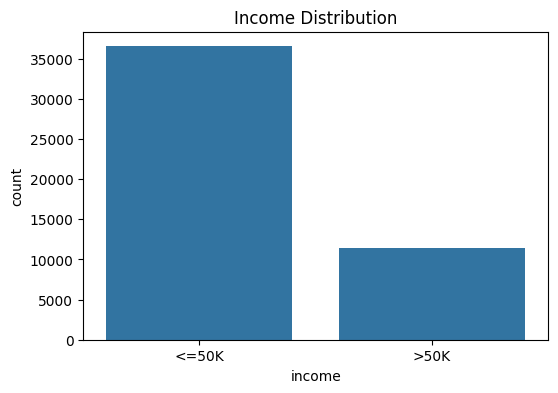

In [22]:
# Distribution Analysis of Features:

# 1) Income Distribution:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='income')     # Seaborn function to create bar plots that show the count of observations in each category of income
plt.title('Income Distribution')
plt.show()

# This graph shows that the large majority of individuals earn <=50K, indicating a significant class imbalance.

In [23]:
# Class Imbalance:

df['income'].value_counts(normalize=True)        # Counts the number of occurrences of each unique value in the income column, returning the proportions (normalize=True)

# We observe that the target variable income is highly imbalanced: ~ 76% of individuals earn ≤50K, while only 24% earn >50K.
# This suggests that models trained on this dataset may be biased toward predicting the majority class if no corrective measures are taken - we need to select appropriated evaluation metrics.

,proportion
income,
<=50K,0.761029
>50K,0.238971


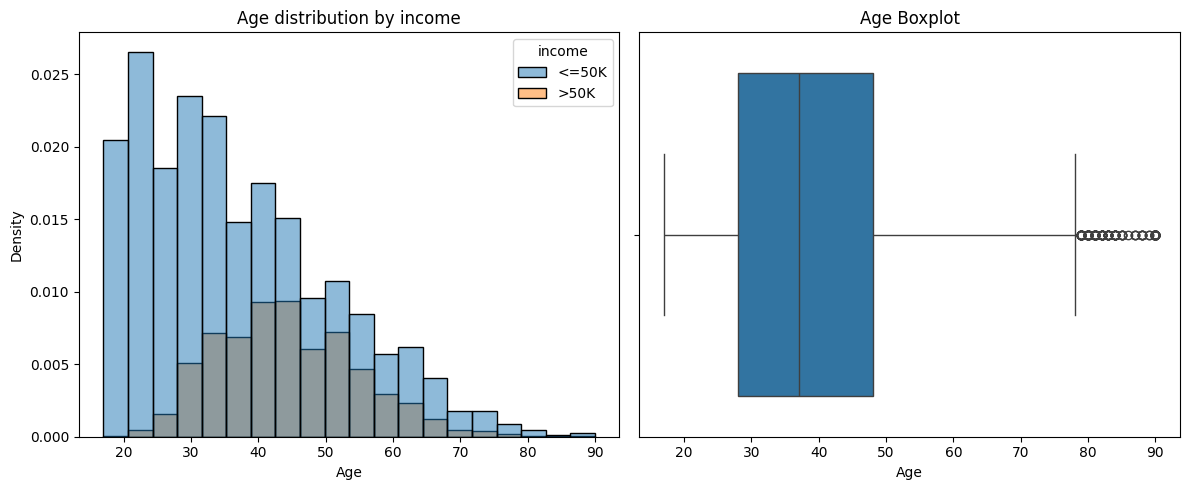

In [24]:
# 2) Age Distribution by income:

plt.figure(figsize=(12,5))

# Histogram age
plt.subplot(1,2,1)
sns.histplot(data=df, x='age', hue='income', bins=20, kde=False, stat='density', alpha=0.5)  # Seaborn function to create histogram of age (x), separated by income categories (hue), with 20 bins, whithout the density curve (kde), normalized to compare classes (stat) and some transparency defined (alpha)
plt.title('Age distribution by income')
plt.xlabel("Age")
plt.ylabel("Density")

# Boxplot age
plt.subplot(1,2,2)
sns.boxplot(x='age', data=df)
plt.title("Age Boxplot")
plt.xlabel("Age")

plt.tight_layout()
plt.show()

# The age histogram shows that most people in both income categories are concentrated in the age range of 20 to 50 years, indicating more people in younger age groups.
# The density of the ≤50K population peaks at younger ages and decreases gradually. This suggests that most young adults (who are early in their careers or in entry-level jobs) fall into this lower income category.
# The higher-income (>50K) population peaks at slightly older ages. This suggests that income tends to increase with age and experience.
# The age boxplot shows that most individuals are between 28 and 48 years old, with the median around 37 years old. There are outliers representing very old individuals.

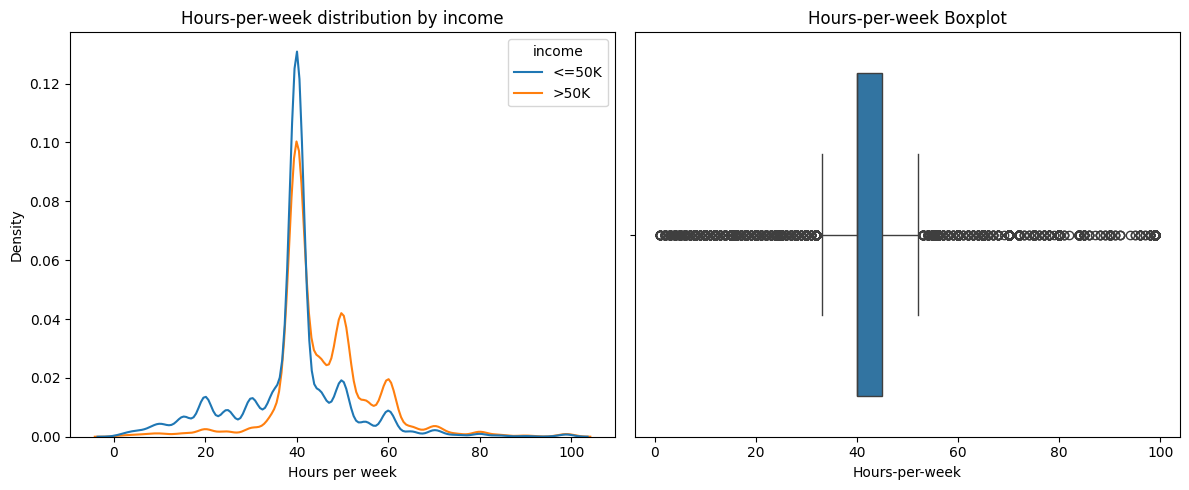

In [25]:
# 3) Hours per Week Distribution by income:

plt.figure(figsize=(12,5))

# KDE hours-per-week
plt.subplot(1,2,1)
sns.kdeplot(data=df, x='hours-per-week', hue='income', common_norm=False)        # Kernel Density Estimate (KDE) shows the probability density of hours-per-week (x), separated by income classes (hue) and each curve independently normalized - allowing for comparison (common_norm)
plt.title('Hours-per-week distribution by income')
plt.xlabel('Hours per week')
plt.ylabel('Density')

# Boxplot hours-per-week
plt.subplot(1,2,2)
sns.boxplot(x='hours-per-week', data=df)
plt.title("Hours-per-week Boxplot")
plt.xlabel("Hours-per-week")

plt.tight_layout()
plt.show()

# The KDE plot shows that most people for both groups work around 40 hours per week, which is visible at the peak of both curves.
# Individuals earning >50K generally work more hours per week than those earning <=50K, with a concentration around 40–60 hours.
# The >50K group exhibits longer tails for high hours (>50–60h/week), which may reflect individuals in more demanding roles or with multiple jobs.
# The hours-per-week boxplot shows the median around 40 hours/week, consistent with the KDE plot. There are extreme outliers in both ends (there are people who work only 1 hour per week to others who work 99 hours per week)

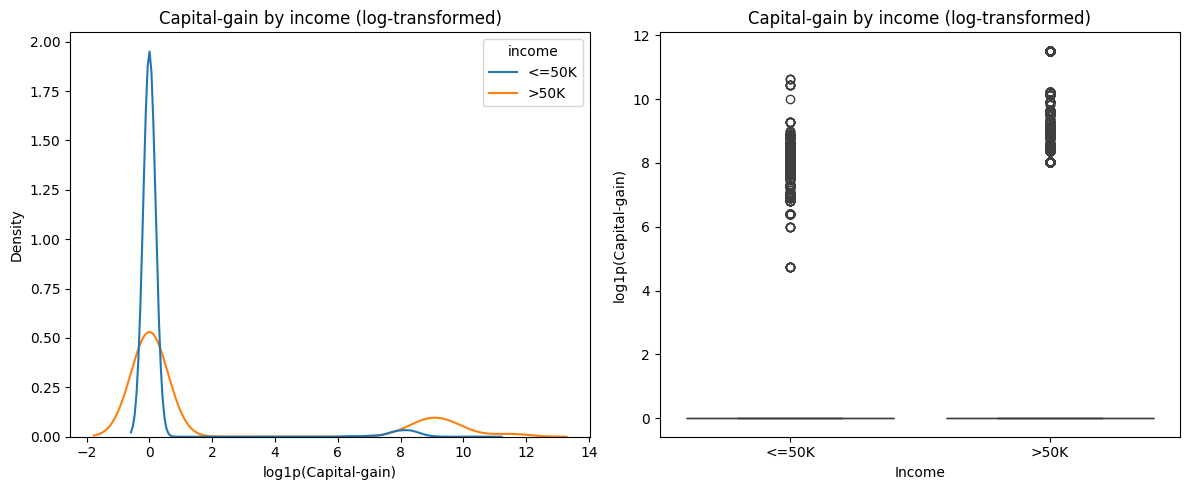

In [26]:
# 4) Capital-gain by income:

plt.figure(figsize=(12,5))

# Capital-gain KDE
plt.subplot(1, 2, 1)
sns.kdeplot(x=np.log1p(df['capital-gain']), hue=df['income'], common_norm=False)   # log-transform reduce the effect of extreme outliers; common_norm=False normalizes each curve separately, allowing for comparison
plt.title("Capital-gain by income (log-transformed)")
plt.xlabel("log1p(Capital-gain)")
plt.ylabel("Density")

# Capital-gain Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x='income', y=np.log1p(df['capital-gain']), data=df)     # log-transform reduce the effect of extreme outliers
plt.title("Capital-gain by income (log-transformed)")
plt.ylabel("log1p(Capital-gain)")
plt.xlabel("Income")

plt.tight_layout()
plt.show()

# The majority of people in both classes have no capital gains.
# People with >50K income tend to have higher capital-gain values (we confirm by: KDE - the little peak around 8-10 is bigger than for the other group; Boxplot - the higher outliers).

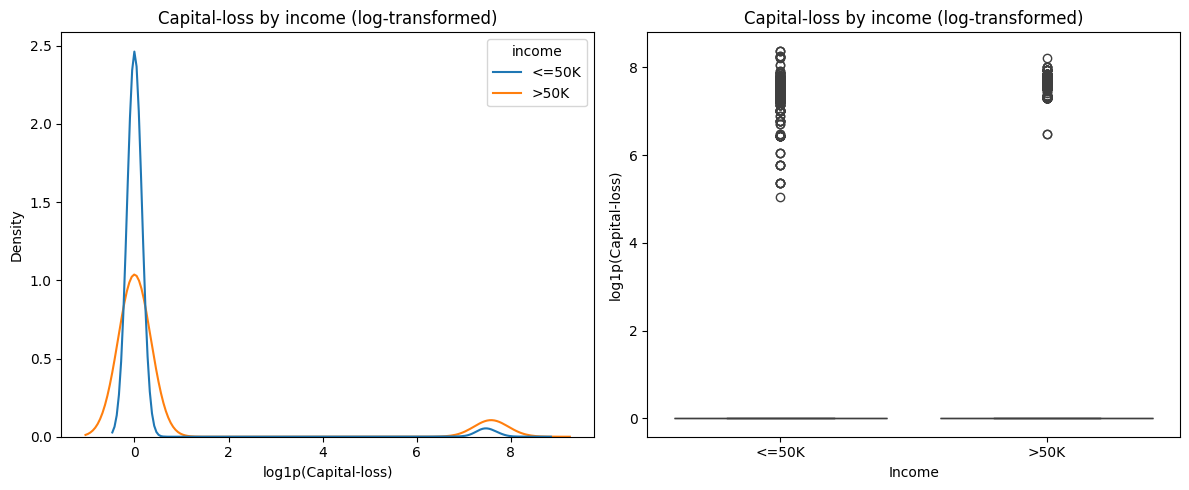

In [27]:
# 5) Capital-loss by income:

plt.figure(figsize=(12,5))

# Capital-loss KDE
plt.subplot(1, 2, 1)
sns.kdeplot(x=np.log1p(df['capital-loss']), hue=df['income'], common_norm=False)    # log-transform reduce the effect of extreme outliers; common_norm=False normalizes each curve separately, allowing for comparison
plt.title("Capital-loss by income (log-transformed)")
plt.xlabel("log1p(Capital-loss)")
plt.ylabel("Density")

# Capital-loss Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x='income', y=np.log1p(df['capital-loss']), data=df)     # log-transform reduce the effect of extreme outliers
plt.title("Capital-loss by income (log-transformed)")
plt.ylabel("log1p(Capital-loss)")
plt.xlabel("Income")

plt.tight_layout()
plt.show()

# The majority of people in both classes have no capital losses.
# People with >50K income experience slightly higher capital-loss values, but the difference is less pronounced than with capital-gain.

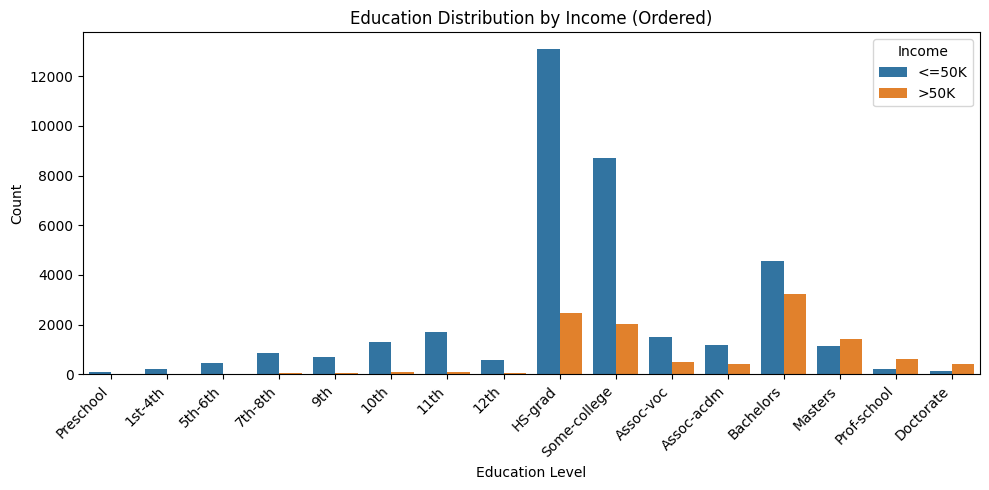

In [28]:
# 6) Education Distribution by income
education_order = [                                                                # order the educational categories to facilitate the visualization
    'Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th',
    'HS-grad', 'Some-college', 'Assoc-voc', 'Assoc-acdm', 'Bachelors', 'Masters',
    'Prof-school', 'Doctorate']

plt.figure(figsize=(10,5))
sns.countplot(data=df, x='education', hue='income', order=education_order)         # countplot() counts the absolute number of individuals for each education level, separated by their income group
plt.title("Education Distribution by Income (Ordered)")
plt.xticks(rotation=45, ha='right')
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.legend(title="Income")
plt.tight_layout()
plt.show()

# The most common education levels are HS-grad, Some-college, and Bachelors for both groups
# People with higher education (Bachelor's, Master's, Doctorate) have more income >50K

# Conclusion:
# While having a high school degree or some college education is the most frequent education level overall, advanced degrees (Bachelors, Masters, Doctorate) are the most effective predictors for achieving a higher income.

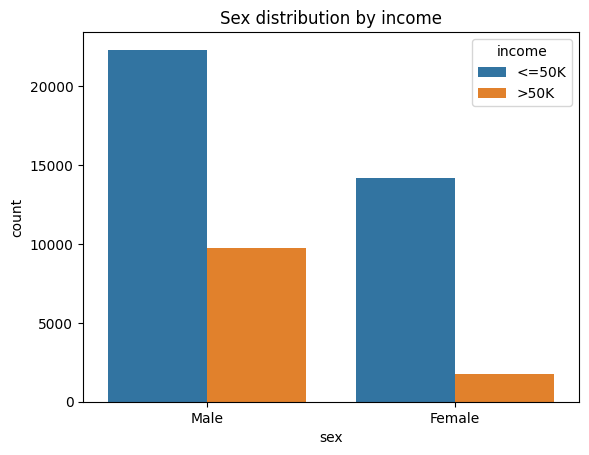

In [29]:
# 7) Sex distribution by income
sns.countplot(data=df, x='sex', hue='income')    # countplot() counts the absolute number of individuals for sex, separated by their income group
plt.title("Sex distribution by income")
plt.show()

# We can observe that men have a higher income in both groups (<= 50K and > 50K).
# Both men and women have more individuals in the <=50K class.
# The proportion of people earning >50K is higher among men than among women.

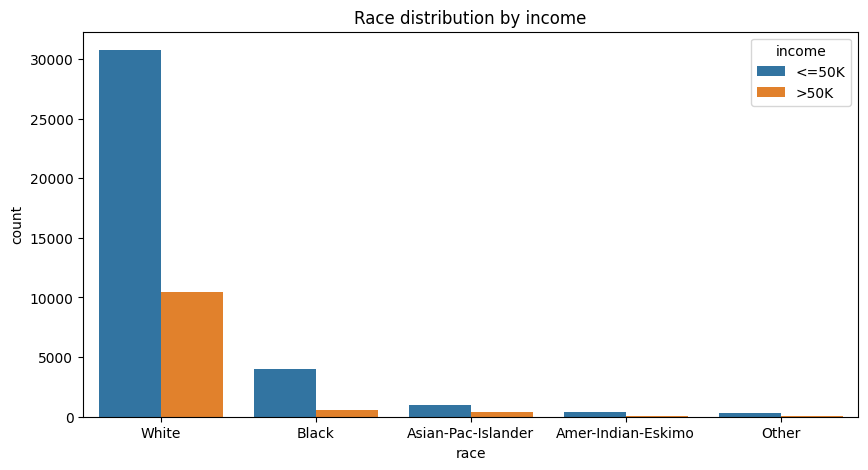

In [30]:
# 8) Race Distribution by income:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='race', hue='income')          # countplot() counts the absolute number of individuals for each race, separated by their income group
plt.title("Race distribution by income")
plt.show()

# The white class concentrates the majority of people for both incomes <= 50K and > 50K.
# For all races, the <=50K class predominates.
# The withe class also tend to show the highest ratio of high earners

## Data Preparation:

In [31]:
#Imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [32]:
# To use Machine Learning Models, we need to encode categorical variables because these models can only process numerical data
# The One-Hot Encoding (OHE) method is generally the safest and most common default for nominal variables

# Separate Target (y) and Features (X), and converts <=50K to 0 and >50K to 1
# We need to drop income (prevents data leakage) and the columns that are non-predictive or redundant ('fnlwgt' is a sampling weight; 'education' is redundant with 'education-num')

# 1) Encoded target
le = LabelEncoder()
y_encoded = le.fit_transform(df['income'])

# 2) Removal of columns
X = df.drop(columns=['income', 'fnlwgt', 'education']).copy()

# 3) Log-transformation (reduce skewness and the impact of extreme outliers - improving the model performance)
X['capital-gain'] = np.log1p(X['capital-gain'])
X['capital-loss'] = np.log1p(X['capital-loss'])

# 4) Separation of categorical and numerical columns
cat_cols = ['workclass', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
num_cols = ['age', 'capital-gain', 'capital-loss', 'hours-per-week']

# 5) Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)
#test_size=0.2: 20% of the data for testing; stratify=y: maintains the proportion of classes in training and testing (essential because of the imbalance); random_state=42: ensures reproducibility

# 6) Make safe copies
X_train = X_train.copy()
X_test = X_test.copy()

# 7) Outliers Treatment (Capping) - treat extreme outliers - replaces any data point that falls outside a defined range with the boundary value itself
for col in num_cols:
    lower = X_train[col].quantile(0.01)    # Finds the value at the 1st percentile in the training data
    upper = X_train[col].quantile(0.99)    # Finds the value at the 99th percentile in the training data

    X_train[col] = X_train[col].clip(lower=lower, upper=upper)      # Any value in the column that is less than the 1st percentile is replaced by its value
    X_test[col] = X_test[col].clip(lower=lower, upper=upper)        # Any value in the column that is greater than the 99th percentile is replaced by its value

# 8) Standardization (Z-score normalization): scaling numerical variables to receive a mean of 0 and a standard deviation of 1 - prevents large-scale features from dominating the model.
numerical_transformer = StandardScaler()

# 9) One-Hot Encoding, ignoring the first category to avoid multi-collinearity
categorical_transformer = OneHotEncoder(
    handle_unknown='ignore',
    sparse_output=False,
    drop='first')

# 10) Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ],
    remainder='passthrough')

# 11) Fit on training only
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# 12) Show shapes
print("Shape X_train_processed:", X_train_processed.shape)
print("Shape X_test_processed:", X_test_processed.shape)
print("\nTarget distribution in train set:")
print(pd.Series(y_train).value_counts(normalize=True))

# Shape X_train and Shape X_test confirms 80% train / 20% test split, which is expected with a total of 48842 records
# Target distribution shows the dataset has class imbalance, which is typical in the dataset

Shape X_train_processed: (38388, 95)
Shape X_test_processed: (9597, 95)

Target distribution in train set:
0    0.761019
1    0.238981
Name: proportion, dtype: float64


## Modelling: Test 3 Different Classifiers and Evaluation


In [33]:
#Imports
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import (accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, classification_report)

In [34]:
#The models chosen were: Logistic Regression, Random Forest and Gradient Boosting
models = {
    'LogisticRegression': LogisticRegression(max_iter=1000, C=1.0, solver='lbfgs'),
    'RandomForest': RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, random_state=42)}

# Logistic Regression hyperparameters: max_iter=1000 (ensures convergence), C=1.0 (default regularization strength), solver='lbfgs' (efficient for medium-sized datasets)
# Random Forest hyperparameters: n_estimators=200 (more trees reduces variance), max_depth=10 (controls overfitting), random_state=42 (ensures reproducibility)
# Gradient Boosting hyperparameters: n_estimators=200 (more boosting rounds improves performance), learning_rate=0.1 (common value; balances speed and generalization), max_depth=3 (controls overfitting), random_state=42 (ensures reproducibility)

In [35]:
results = {}

for name, model in models.items():              # for cycle to facilitate. The output order corresponds to 1) Logistic Regression, 2) Random Forest, and 3) Gradient Boosting

    # Train
    model.fit(X_train_processed, y_train)

    # Predict
    y_pred = model.predict(X_test_processed)
    y_proba = model.predict_proba(X_test_processed)[:, 1]

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)

    # Save all
    results[name] = {
        'accuracy': acc,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'auc': auc,
        'confusion_matrix': cm,
        'classification_report': classification_report(y_test, y_pred)}

    # Results
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"ROC-AUC: {auc:.4f}")
    print("\nConfusion Matrix:")
    print(cm)
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

Accuracy: 0.8408
Precision: 0.7051
Recall: 0.5735
F1-score: 0.6325
ROC-AUC: 0.8940

Confusion Matrix:
[[6754  550]
 [ 978 1315]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.92      0.90      7304
           1       0.71      0.57      0.63      2293

    accuracy                           0.84      9597
   macro avg       0.79      0.75      0.77      9597
weighted avg       0.83      0.84      0.83      9597

Accuracy: 0.8546
Precision: 0.8171
Recall: 0.5046
F1-score: 0.6239
ROC-AUC: 0.9063

Confusion Matrix:
[[7045  259]
 [1136 1157]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      7304
           1       0.82      0.50      0.62      2293

    accuracy                           0.85      9597
   macro avg       0.84      0.73      0.77      9597
weighted avg       0.85      0.85      0.84      9597

Accuracy: 0.8678
Precision: 0.7841
Recal

In [36]:
# Compare all models in a table:
summary = pd.DataFrame({
    model: {
        'Accuracy': results[model]['accuracy'],
        'Precision': results[model]['precision'],
        'Recall': results[model]['recall'],
        'F1-score': results[model]['f1'],
        'ROC-AUC': results[model]['auc']
    }
    for model in results
}).T

print("\n Summary of Model Performance")
print(summary)


 Summary of Model Performance
                    Accuracy  Precision    Recall  F1-score   ROC-AUC
LogisticRegression  0.840784   0.705094  0.573485  0.632516  0.893953
RandomForest        0.854642   0.817090  0.504579  0.623888  0.906299
GradientBoosting    0.867771   0.784129  0.616223  0.690110  0.919907


## Statistical Tests - Comparing proportions and A/B Testing

In [37]:
# 1) Gender and Income:
# We want to test if the proportion of women earning >50K is equal to the proportion of men earning >50K

# Null Hypothesis (H0): Proportion of women earning >50K = Proportion of men earning >50K
# Alternative Hypothesis (H1): Proportion of women earning >50K ≠ Proportion of men earning >50K

# We will a two-proportion z-test since we are comparing proportions between two independent groups
from statsmodels.stats.proportion import proportions_ztest

# Encode income as binary
df['income_binary'] = df['income'].apply(lambda x: 1 if '>50K' in x else 0)

# Separate groups by sex
women = df[df['sex'] == 'Female']
men = df[df['sex'] == 'Male']

# Count high-income individuals and total in each group
count_gender = [women['income_binary'].sum(), men['income_binary'].sum()]
nobs_gender = [len(women), len(men)]

# Two-proportion z-test
stat_gender, p_gender = proportions_ztest(count_gender, nobs_gender)
print("Question 1: Gender and Income")
print(f"Z-statistic: {stat_gender:.4f}, p-value: {p_gender:.4f}")

if p_gender < 0.05:
    print("Result: Reject H0 → Men and women have significantly different proportions earning >50K\n")
else:
    print("Result: Fail to reject H0 → No significant difference\n")

# Report and interpret: If p_value < 0.05 → reject H0 → there is a significant difference in high-income proportions between men and women. If p_value >= 0.05 → fail to reject H0 → no significant difference.
# The p-value is very small (<0.05), so we reject the null hypothesis. This suggests men are significantly more likely than women to earn >50K.

Question 1: Gender and Income
Z-statistic: -47.0240, p-value: 0.0000
Result: Reject H0 → Men and women have significantly different proportions earning >50K



In [38]:
# 2) Weekly Working Hours A/B Test:
# We want to compare the proportion of high-income individuals between two groups based on weekly working hours

# Null Hypothesis (H0): Proportion earning >50K in Group A (>40 hours/week) = Proportion earning >50K in Group B (≤40 hours/week)
# Alternative Hypothesis (H1): Proportion earning >50K in Group A ≠ Proportion earning >50K in Group B

# We will a two-proportion z-test since we are comparing proportions between two independent groups
from statsmodels.stats.proportion import proportions_ztest

# Encode income as binary
df['income_binary'] = df['income'].apply(lambda x: 1 if '>50K' in x else 0)

# Define groups: A = >40 hours, B = <=40 hours
group_A = df[df['hours-per-week'] > 40]
group_B = df[df['hours-per-week'] <= 40]

# Count high-income individuals and total in each group
count_hours = [group_A['income_binary'].sum(), group_B['income_binary'].sum()]
nobs_hours = [len(group_A), len(group_B)]

# Two-proportion z-test
stat_hours, p_hours = proportions_ztest(count_hours, nobs_hours)
print("Question 2: Weekly Working Hours A/B Test")
print(f"Z-statistic: {stat_hours:.4f}, p-value: {p_hours:.4f}")

if p_hours < 0.05:
    print("Result: Reject H0 → High-income proportion differs between >40 and <=40 hours/week groups")
else:
    print("Result: Fail to reject H0 → No significant difference between groups")

# Report and interpret: If p_value < 0.05 → reject H0 → there is a significant difference in high-income proportions differs between >40 and <=40 hours/week groups. If p_value >= 0.05 → fail to reject H0 → no significant difference.
# The p-value is very small (<0.05), so we reject the null hypothesis. This suggests individuals working more than 40 hours per week have a higher proportion of high-income earners than those working 40 hours or less

Question 2: Weekly Working Hours A/B Test
Z-statistic: 53.3368, p-value: 0.0000
Result: Reject H0 → High-income proportion differs between >40 and <=40 hours/week groups
